# **Segmentez des clients d'un site e-commerce** 
## partie 4/4 : présentation pour un collègue afin d’obtenir ses retours 

### <br> Résumé des 3 (4) notebooks précédents :

> &emsp; "Afin de réaliser une segmentation de clientèle pour la société Olis, j'ai préparé les notebooks ci-joints. Peux-tu me faire faire un retour ? Je te remercie d'avance pour ton aide. <br><br>

## Notebook 1 : merging, exploration

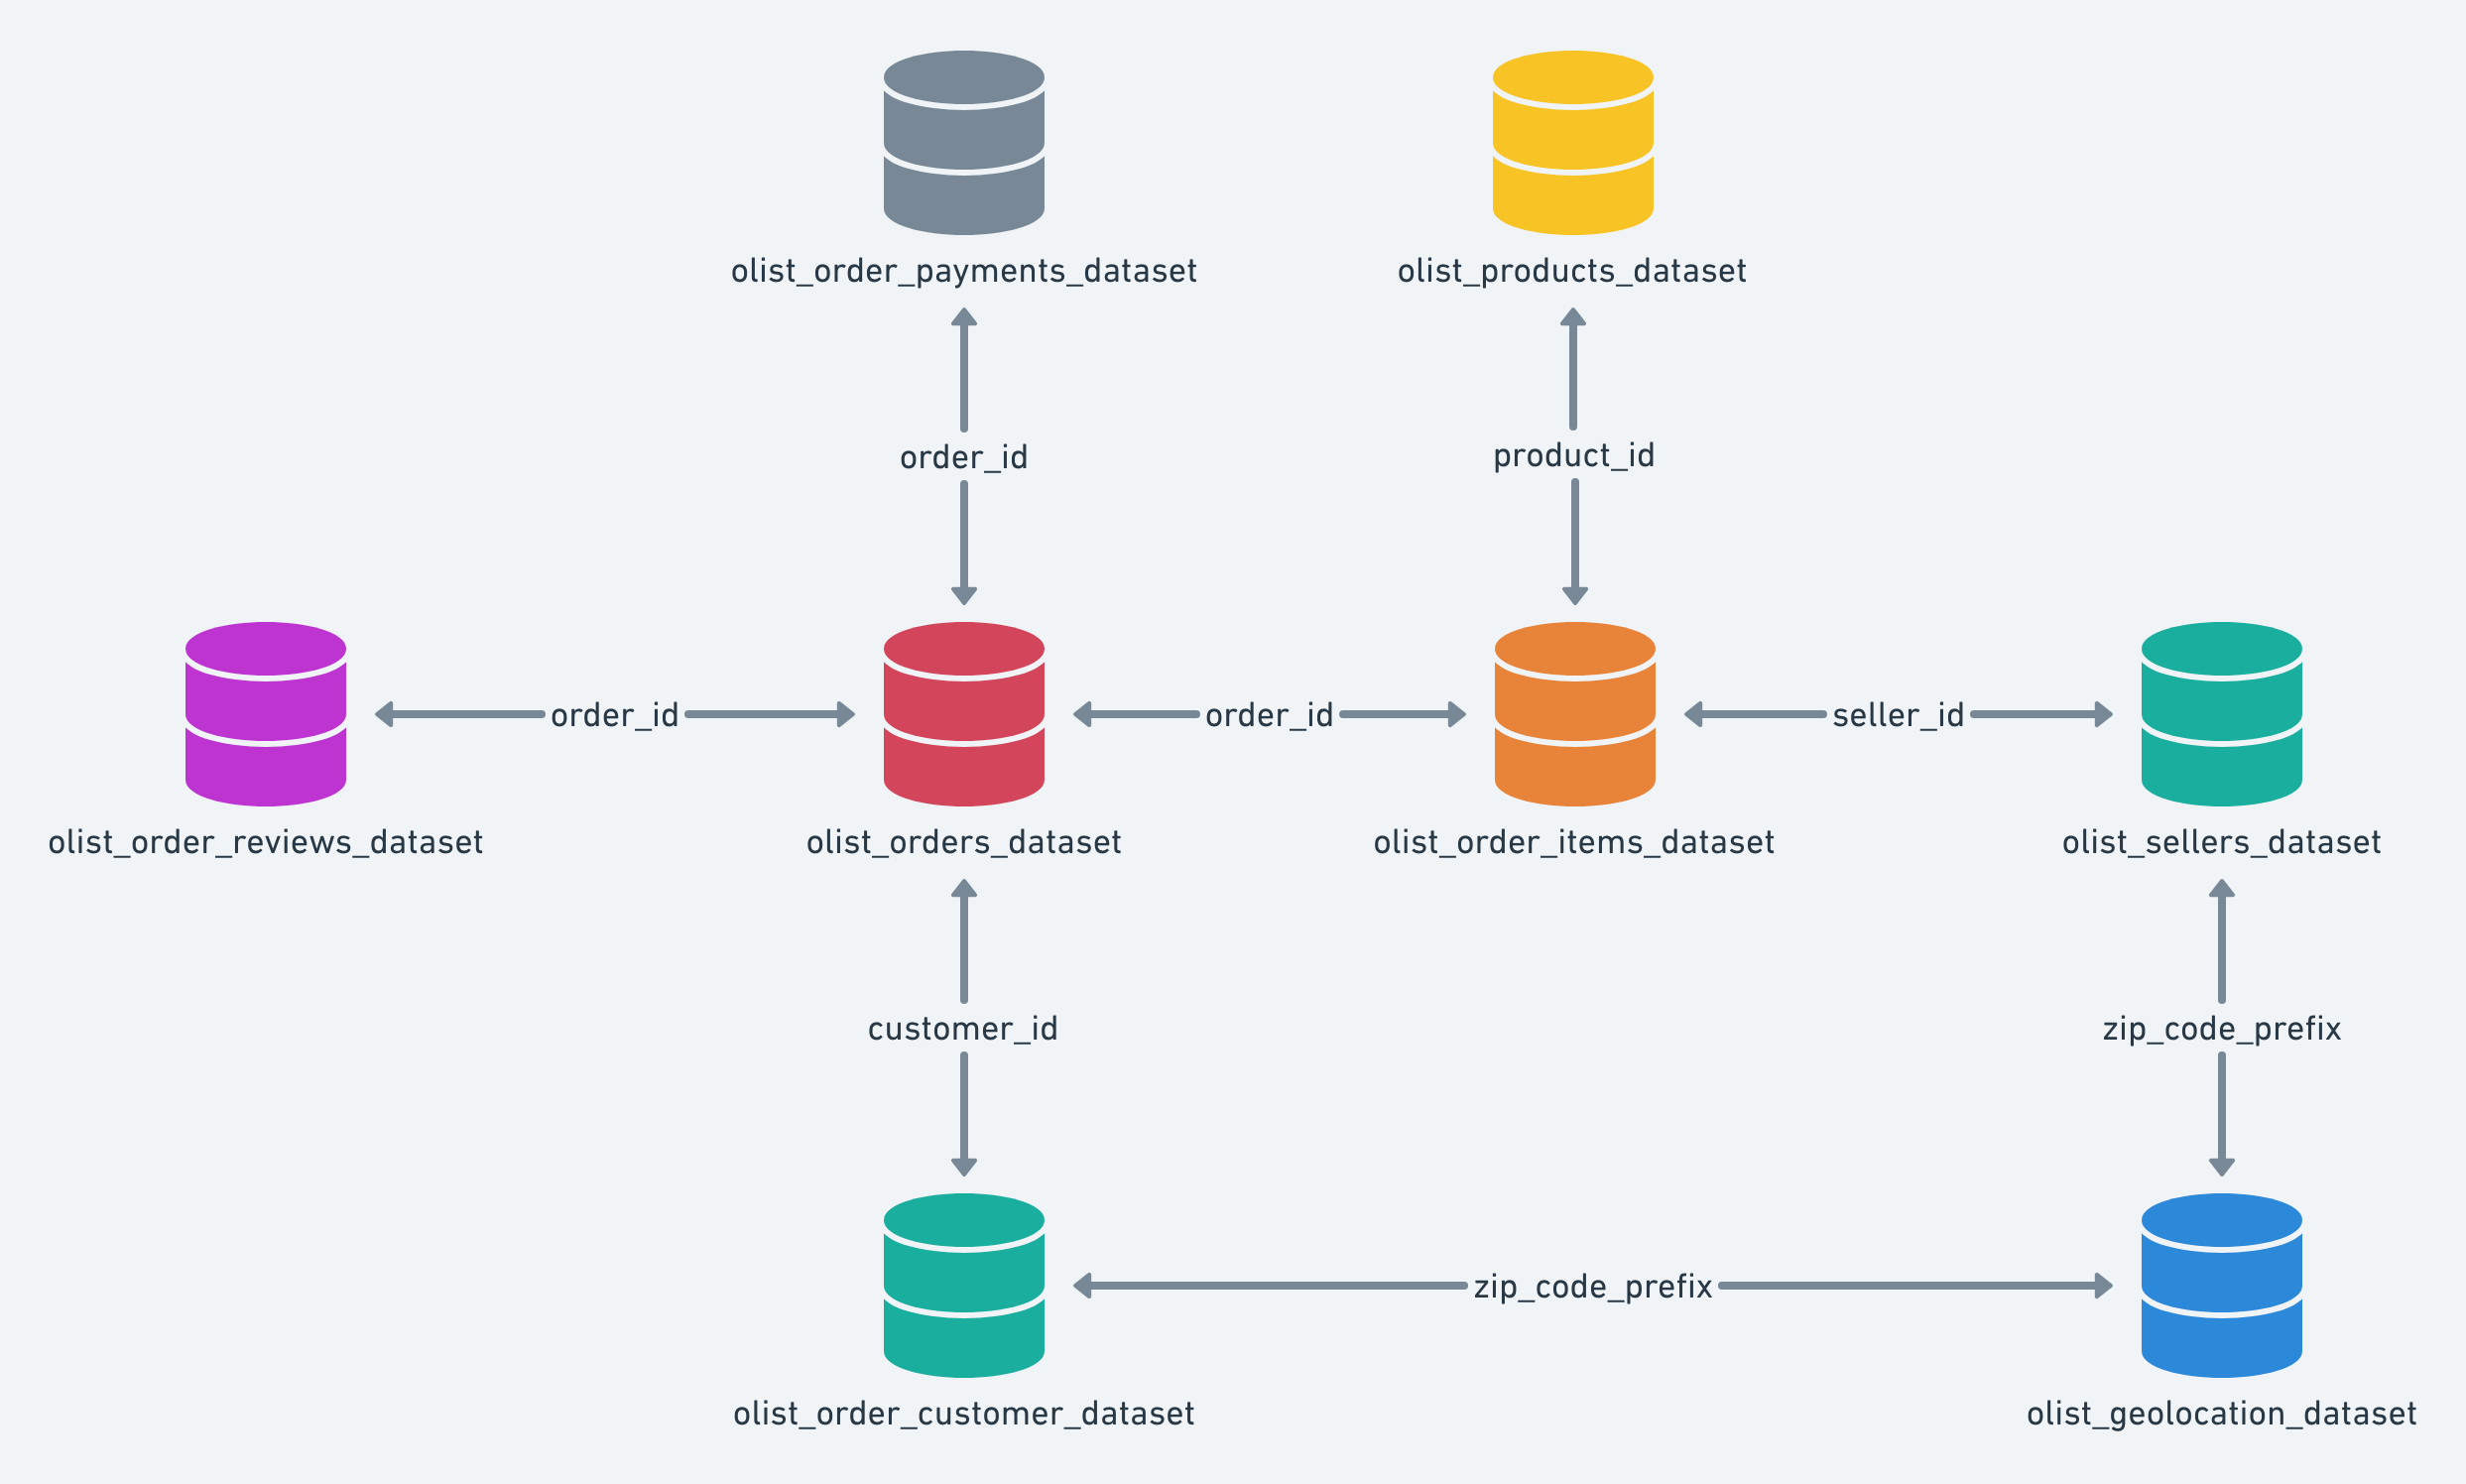

In [1]:
# Je pense que cette partie devrait être OK, parce que j'ai pas mal d'expérience en manipuation de
# bases de données, et la bdd d'Olis est remarquablement bien structurée et propre.

# Comme tu peux le voir sur le schema, tout tourne autour de la commande.
# C'est tout à fait logique, pour 2 raisons :
# - les paquets d'info arrivent à la bdd à chaque commande,
# - les commandes ont une position centale car elles relient le client aux reviews, à la compts, 
# aux articles, puis au(x) vendeur(s), etc...

from IPython.display import Image
image_path = './img/data_schema.png'
Image(filename=image_path)


In [2]:
# A partir de ces 9 tables, on réalise plusieurs sélections / mergings / aggrégations successives.

# Pour plusieurs mergings on peut faire des jointures internes parfaites, ça montre que les clés sont fiables.
# Dans certains cas j'ai préféré faire une jointure à gauche, par exemple quand je n'étais pas encore certain
# de ce qu'on allait garder exactement après le feature engineering.
# C'est rassurant d'avoir un deuxième avis. Est-ce que tout te parait ok ? 

# Voici les types de retour dont je pense avoir particulièrement besoin :

# -> Les jointures et dataframes aggrégés sont-ils corrects ?
# - Les features choisies / crées te semblent-elles les + parlantes ?
# Y a-t-il d'autres pistes que tu aurais suivies pour mieux comprendre / décrire les profils de clients ?
# Est-ce que tu trouves que l'exploration et les visualisations sont claires et pertinentes ?
# (j'ai profité de l'exploration pour commencer à tester Plotly, qui m'a été très utile pour la suite)
# -> la syntaxe est OK / PEP8 ?

# Bref, la démarche ou du moins les préparatifs te paraissent-ils solides jusque-là ?

# Bien sûr si j'oublie qqch, n'hésite pas à ajouter tt ce qui te semble utile.
# Pour les notebooks suivants, il s'agit de mon premier clustering, donc le principre est le même,
# mais tu auras sans doute bcp + de conseils à me donner. 

# J'ai fait de mon mieux pour l'EDA , j'espère que la démarche est correcte et clairement expliquée.


## Notebook 2 : essais de modélisation sur 3 features

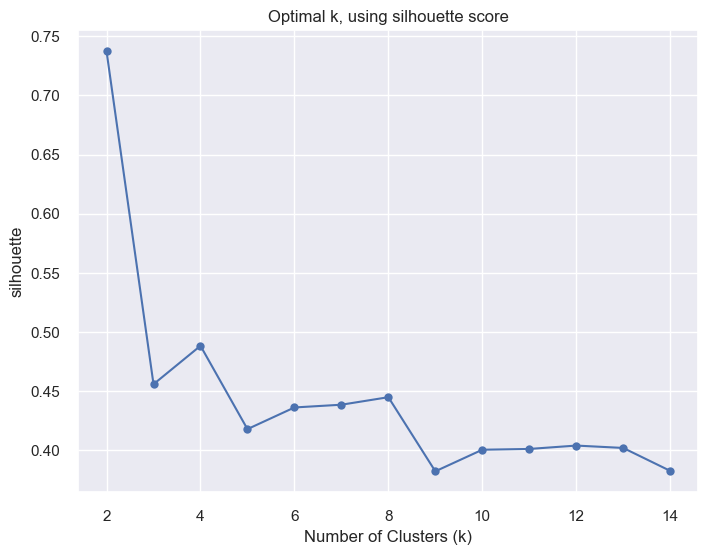

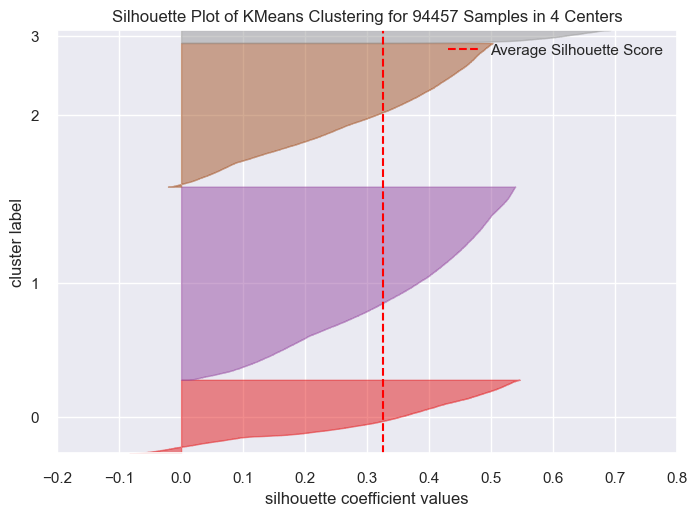

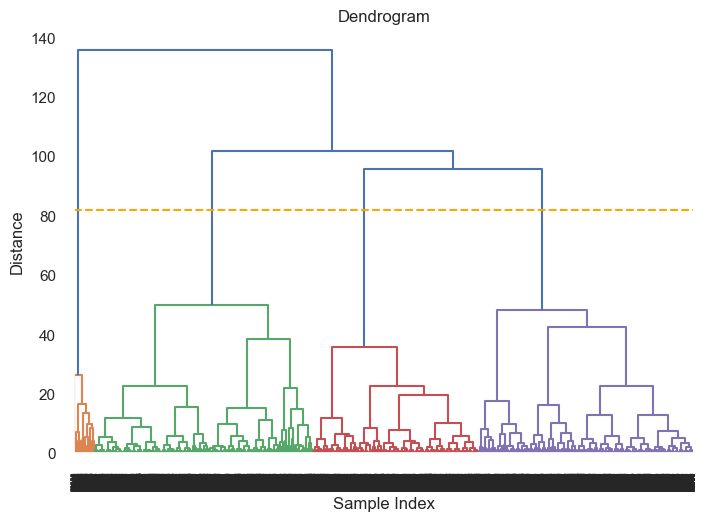

In [3]:
# On rentre dans le coeur du projet :
# tester, évaluer et comparer 3 modèles simples de clustering, sur 3 features : R, F, M.

# Nous testons les performances de 3 modèles : k-means, dendro et DBSCAN.
# dendro c comme ca que j'appelle l'algorithme hiérarchique (agglomératif).

# Spoiler :
# k-means est plus stable, plus rapide, et ses clusters ont meilleur gout ! Surtout le jaune.

# Problème rencontré : limites des param default notebook vscode 
# (la taille mémoire est vite atteinte quand on plot beaucoup, ensuite le notebook crash)

# Solution proposée : travailler dans un dossier de fichiers pythons, hors notebook ?
# (Si je modifie le comportement par défaut du notebook, je risque de créer des problèmes de
# compatibilité avec l'environnement des collègues... 
# Pas terrible pour un outil de partage !)

# Autre problème : les résultats pour le coefficient de silhouette du dendro, quand on change la méthode de lien,
# me paraissent curieux. Je pense que ces résultats sont moins fiables à cause du sampling.

# Je te joins les résultats pour ce qui prend + de temps dans ce notebook,
# comme ça tu n'auras pas besoin d'attendre :

# Silhouette k-means
display(Image(filename='./img/silhouette_rfm.png'))
display(Image(filename='./img/poof.png'))

# dendrogramme
display(Image(filename='./img/dendro_rfm.png'))


## Notebook 2bis : essais de modélisation sur 4 features

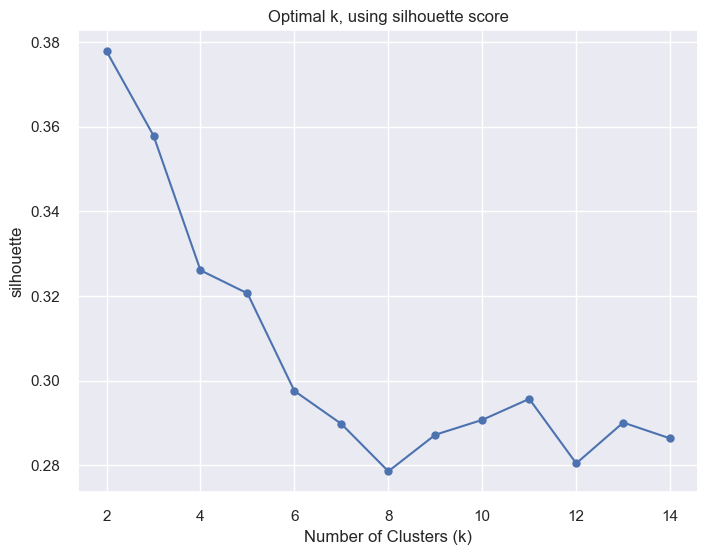

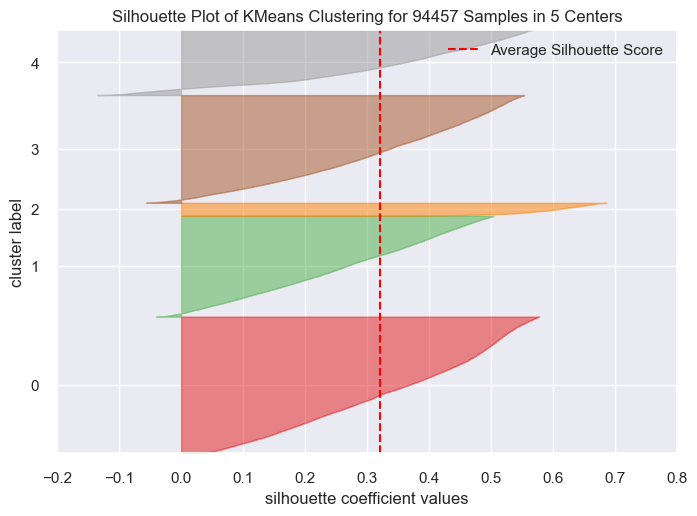

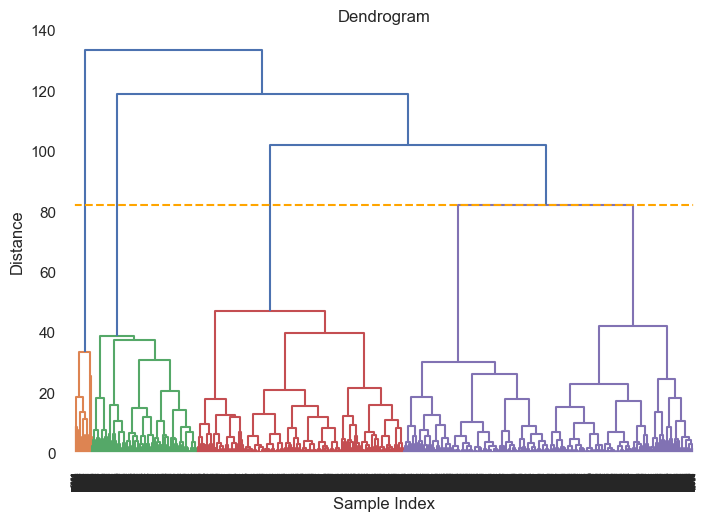

In [4]:
# Problèmes rencontrés :
# Pas trouvé d'outils de visualisation 4D+ natifs.
# Couleurs clustering difficiles à afficher automatiquement. Or, visualisation très importante ici.

# Solutions proposées : 
# - réglages "manuels" dans l'immédiat
# - idée de projet : créer une surcouche (wrapper) à plotly pour implémenter plus facilement
# des stratégies adaptées de visualisation en 4D+ ?

# Utiliser plutôt un autre outil ? (moteur 3D comme Blender par ex ?)

# Silhouette k-means
display(Image(filename='./img/silhouette_4D.png'))
display(Image(filename='./img/poof_rfms5.png'))

# dendrogramme
display(Image(filename='./img/dendro_rfms.png'))


## Notebook 3 : simulation

In [5]:
# Ici en fonction des besoins spécifiques du client, ma conclusion est qu'on peut proposer 2 solutions :

# - Le modèle tridimensionnel classique, RFM, qui propose 4 clusters et peut être entrainé très rapidement,
# pour des analyses ponctuelles ou d'urgence, par exemple consécutives à une période inhabituelle.
# - Le modèle RFMS, qui prend en compte une dimension supplémentaire et fournit un clustering 
# en 5 sous-partitions, qui ont bcp de sens métier (voir description actionnable fin notebook 2bis).

# Ce second modèle a besoin d'être entrainé sur bcp (bcp) + de data, afin d'être suffismt stable ds le tps.
# Il n'est donc utilisable que par de très grandes entreprises, ayant accès à des qtités de data
# assez considérables ( > plusieurs dizaines de milliers de clients. 
# Ce n'est pas un outil pour le petit commerce de quartier !)

# Voilà, je pense t'avoir résumé l'essentiel, tu vas découvrir le détail dans les notebooks.
# Bonne lecture, merci encore !


## Anecdote 

In [6]:
# Je viens de passer une heure à chercher un bug ds mon code, et à mettre en place 
# des "mini-tests unitaires" un peu partout pour le trouver...

# Parce que quand j'ai vu les premières courbes d'évaluation de la stabilité des prédictions du modèle
# dans le temps, je me suis dit c obligé j'ai dû faire une erreur 
# (Tu comprendras en arrivant à la fin du notebook simulation !)

# G fini par comprendre qu'il n'y avait pas de bug. Simplement trop peu de data.
# Ca t'arrive aussi de chasser un bug fantôme ? 

# Au moins ca m'a donné un ordre de grandeur pour le "curse of dimensionality" dont on entend parler 
# tellement souvent en datascience. 

# Allez, bon courage et bonne journée à toi !
